<a href="https://colab.research.google.com/github/ThanhThuyHuynh/ML/blob/main/Lab_6_20130429_HuynhThiThanhThuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Thực hành ML/ML Lab6'


Mounted at /content/gdrive
/content/gdrive/MyDrive/Thực hành ML/ML Lab6


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score
from sklearn import datasets
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import utils
import seaborn as sns

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# code
mnist = datasets.load_digits(as_frame=True)


In [ ]:
x = mnist['data']
y = mnist['target']


In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x, y)


RandomForestClassifier()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)
feature_imp

pixel_2_5    0.053934
pixel_5_3    0.042566
pixel_3_2    0.041261
pixel_5_2    0.039107
pixel_4_1    0.035616
               ...   
pixel_3_7    0.000011
pixel_0_0    0.000000
pixel_6_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

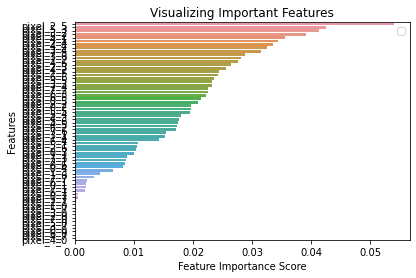

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
features = feature_imp.index[0:2].values
X_new = x[feature_imp.index[0:2]]
X_new

,pixel_2_5,pixel_5_3
0,11.0,0.0
1,6.0,16.0
2,16.0,16.0
3,0.0,0.0
4,2.0,16.0
...,...,...
1792,16.0,0.0
1793,13.0,7.0
1794,16.0,14.0
1795,16.0,0.0


In [ ]:
x_new = SelectKBest(f_classif, k=4).fit_transform(x, y)

x_new.shape

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(1797, 4)

In [ ]:
Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.35)

In [ ]:
Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X_new, y, test_size = 0.35)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain, yTrain)

SVC()

In [ ]:
y_pred = clf.predict(xTest)
y_pred

svm_cm = confusion_matrix(yTest, y_pred)
svm_acc = accuracy_score(yTest, y_pred)
svm_pre = precision_score(yTest, y_pred, average='macro')
svm_re = recall_score(yTest, y_pred, average='macro')
svm_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, yTrain)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(xTest)
y_pred

rd_cm = confusion_matrix(yTest, y_pred)
rd_acc = accuracy_score(yTest, y_pred)
rd_pre = precision_score(yTest, y_pred, average='macro')
rd_re = recall_score(yTest, y_pred, average='macro')
rd_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:

model = GaussianNB()
model.fit(Xtrain, yTrain)

GaussianNB()

In [ ]:
y_pred = model.predict(xTest)
y_pred

by_cm = confusion_matrix(yTest, y_pred)
by_acc = accuracy_score(yTest, y_pred)
by_pre = precision_score(yTest, y_pred, average='macro')
by_re = recall_score(yTest, y_pred, average='macro')
by_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+---------------+----------------+-----------------+--------------+----------+
|   Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+---------------+----------------+-----------------+--------------+----------+
|      SVM      |     0.992      |      0.992      |    0.991     |  0.991   |
| Random forest |     0.981      |      0.981      |    0.979     |   0.98   |
|  Naive Bayes  |     0.852      |      0.871      |    0.849     |  0.846   |
+---------------+----------------+-----------------+--------------+----------+


In [ ]:
# using selection feature SelectKBest. 
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+---------------+----------------+-----------------+--------------+----------+
|   Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+---------------+----------------+-----------------+--------------+----------+
|      SVM      |     0.574      |      0.567      |    0.573     |  0.549   |
| Random forest |     0.555      |      0.553      |    0.555     |  0.548   |
|  Naive Bayes  |     0.498      |      0.482      |    0.497     |  0.469   |
+---------------+----------------+-----------------+--------------+----------+


In [ ]:
# using selection feature . 
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+---------------+----------------+-----------------+--------------+----------+
|   Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+---------------+----------------+-----------------+--------------+----------+
|      SVM      |     0.412      |      0.408      |    0.414     |  0.378   |
| Random forest |     0.374      |      0.346      |    0.364     |  0.345   |
|  Naive Bayes  |     0.397      |      0.316      |     0.4      |  0.328   |
+---------------+----------------+-----------------+--------------+----------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [ ]:
dataset = pd.read_csv("bank.csv")
dataset

#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
dataset[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = sc.fit_transform(dataset[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
#code
from sklearn.preprocessing import OneHotEncoder

data = dataset[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]

encoder = OneHotEncoder(sparse=False)

onehot = encoder.fit_transform(data)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data)
dataset = pd.concat([dataset, dummies], axis='columns')


In [ ]:

dataset_dropped = dataset.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis='columns')
dataset_dropped

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0,0,...,0,0,1,0,0,0,1,0,0,0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
X = dataset_dropped.drop(columns = ['deposit'])
y = dataset_dropped['deposit']


In [ ]:
Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)

In [ ]:
#code
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain, yTrain)
y_pred = clf.predict(xTest)
y_pred

svm_acc = accuracy_score(yTest, y_pred)
svm_pre = precision_score(yTest, y_pred, average='macro')
svm_re = recall_score(yTest, y_pred, average='macro')
svm_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, yTrain)

y_pred = clf.predict(xTest)
y_pred


rd_acc = accuracy_score(yTest, y_pred)
rd_pre = precision_score(yTest, y_pred, average='macro')
rd_re = recall_score(yTest, y_pred, average='macro')
rd_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
kNN = KNeighborsClassifier()
kNN.fit(Xtrain, yTrain)
y_pred = kNN.predict(xTest)

kacc = accuracy_score(yTest, y_pred)
kpre = precision_score(yTest, y_pred, average='weighted')
kre = recall_score(yTest, y_pred, average='weighted')
kkf1_c = f1_score(yTest, y_pred,average='weighted')

In [ ]:
model = GaussianNB()
model.fit(Xtrain, yTrain)

y_pred = model.predict(xTest)
y_pred

by_acc = accuracy_score(yTest, y_pred)
by_pre = precision_score(yTest, y_pred, average='macro')
by_re = recall_score(yTest, y_pred, average='macro')
by_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["KNN", round(kacc, 3), round(kpre, 3), round(kre,3 ), round(kkf1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+---------------+----------------+-----------------+--------------+----------+
|   Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+---------------+----------------+-----------------+--------------+----------+
|      SVM      |      0.72      |       0.72      |    0.715     |  0.716   |
| Random forest |      1.0       |       1.0       |     1.0      |   1.0    |
|      KNN      |     0.846      |      0.847      |    0.846     |  0.846   |
|  Naive Bayes  |      1.0       |       1.0       |     1.0      |   1.0    |
+---------------+----------------+-----------------+--------------+----------+


#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [ ]:
X_new = SelectKBest(f_classif, k=4).fit_transform(X, y)
Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X_new, y, test_size = 0.35)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:

#code
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain, yTrain)
y_pred = clf.predict(xTest)
y_pred

svm_acc = accuracy_score(yTest, y_pred)
svm_pre = precision_score(yTest, y_pred, average='macro')
svm_re = recall_score(yTest, y_pred, average='macro')
svm_f1_c = f1_score(yTest, y_pred, average='macro')


In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, yTrain)

y_pred = clf.predict(xTest)
y_pred


rd_acc = accuracy_score(yTest, y_pred)
rd_pre = precision_score(yTest, y_pred, average='macro')
rd_re = recall_score(yTest, y_pred, average='macro')
rd_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
kNN = KNeighborsClassifier()
kNN.fit(Xtrain, yTrain)
y_pred = kNN.predict(xTest)

kacc = accuracy_score(yTest, y_pred)
kpre = precision_score(yTest, y_pred, average='weighted')
kre = recall_score(yTest, y_pred, average='weighted')
kkf1_c = f1_score(yTest, y_pred,average='weighted')

In [ ]:
model = GaussianNB()
model.fit(Xtrain, yTrain)

y_pred = model.predict(xTest)
y_pred

by_acc = accuracy_score(yTest, y_pred)
by_pre = precision_score(yTest, y_pred, average='macro')
by_re = recall_score(yTest, y_pred, average='macro')
by_f1_c = f1_score(yTest, y_pred, average='macro')

In [ ]:
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["KNN", round(kacc, 3), round(kpre, 3), round(kre,3 ), round(kkf1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+---------------+----------------+-----------------+--------------+----------+
|   Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+---------------+----------------+-----------------+--------------+----------+
|      SVM      |     0.711      |      0.714      |    0.708     |  0.708   |
| Random forest |      1.0       |       1.0       |     1.0      |   1.0    |
|      KNN      |     0.964      |      0.966      |    0.964     |  0.964   |
|  Naive Bayes  |      1.0       |       1.0       |     1.0      |   1.0    |
+---------------+----------------+-----------------+--------------+----------+


#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [3]:
url = "creditcard.csv"
dataframe = pd.read_csv(url).head(100000)
df = dataframe.values
X = df[:,:-1]
y = df[:,-1]

In [6]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.017627   0.00879178 0.01168542 0.03477747 0.0493477  0.01031789
 0.01067237 0.02659702 0.0082278  0.01921885 0.05546352 0.08167675
 0.07467222 0.01586609 0.12559258 0.01849618 0.03634833 0.20514026
 0.0453297  0.01581422 0.01906176 0.01190631 0.01488307 0.00713534
 0.01091205 0.01365996 0.02410183 0.01121827 0.00561306 0.0098452 ]


In [7]:
Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X, y, test_size = 0.33, random_state=1)

In [14]:

#code
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain, yTrain)
y_pred = clf.predict(xTest)
y_pred

svm_acc = accuracy_score(yTest, y_pred)
svm_pre = precision_score(yTest, y_pred, average='macro')
svm_re = recall_score(yTest, y_pred, average='macro')
svm_f1_c = f1_score(yTest, y_pred, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain, yTrain)
y_pred = classifier.predict(xTest)
y_pred

reg_acc = accuracy_score(yTest, y_pred)
reg_pre = precision_score(yTest, y_pred, average='macro')
reg_re = recall_score(yTest, y_pred, average='macro')
reg_f1_c = f1_score(yTest, y_pred, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, yTrain)

y_pred = clf.predict(xTest)
y_pred


rd_acc = accuracy_score(yTest, y_pred)
rd_pre = precision_score(yTest, y_pred, average='macro')
rd_re = recall_score(yTest, y_pred, average='macro')
rd_f1_c = f1_score(yTest, y_pred, average='macro')

In [11]:
kNN = KNeighborsClassifier()
kNN.fit(Xtrain, yTrain)
y_pred = kNN.predict(xTest)

kacc = accuracy_score(yTest, y_pred)
kpre = precision_score(yTest, y_pred, average='weighted')
kre = recall_score(yTest, y_pred, average='weighted')
kkf1_c = f1_score(yTest, y_pred,average='weighted')

In [12]:
model = GaussianNB()
model.fit(Xtrain, yTrain)

y_pred = model.predict(xTest)
y_pred

by_acc = accuracy_score(yTest, y_pred)
by_pre = precision_score(yTest, y_pred, average='macro')
by_re = recall_score(yTest, y_pred, average='macro')
by_f1_c = f1_score(yTest, y_pred, average='macro')

In [15]:
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(svm_acc, 3), round(svm_pre, 3), round(svm_re,3 ), round(svm_f1_c, 3 )])
t.add_row(["Random forest",round(rd_acc, 3), round(rd_pre, 3), round(rd_re,3 ), round(rd_f1_c, 3 )])
t.add_row(["KNN", round(kacc, 3), round(kpre, 3), round(kre,3 ), round(kkf1_c, 3 )])
t.add_row(["LogisticRegression", round(reg_acc, 3), round(reg_pre, 3), round(reg_re,3 ), round(reg_f1_c, 3 )])
t.add_row(["Naive Bayes", round(by_acc, 3), round(by_pre, 3), round(by_re,3 ), round(by_f1_c, 3 )])
print(t)

+--------------------+----------------+-----------------+--------------+----------+
|     Algorithm      | accuracy_score | precision_score | recall_score | f1_score |
+--------------------+----------------+-----------------+--------------+----------+
|        SVM         |     0.998      |      0.499      |     0.5      |  0.499   |
|   Random forest    |      1.0       |      0.991      |    0.907     |  0.945   |
|        KNN         |     0.998      |      0.998      |    0.998     |  0.997   |
| LogisticRegression |     0.999      |      0.824      |    0.828     |  0.826   |
|    Naive Bayes     |     0.984      |      0.552      |    0.914     |  0.589   |
+--------------------+----------------+-----------------+--------------+----------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.